# t-tests —— Did Man Utd take different numbers of corners than Man City?

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import pathlib
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

# Opening the dataset

PL 17/18:
- events data
- team data

In [2]:
# open event data
path = os.path.join(str(pathlib.Path().resolve()), 'Wyscout','events', 'events_England.json')
with open(path) as f:
    data = json.load(f)

events = pd.DataFrame(data)

In [3]:
# open team data
path = os.path.join(str(pathlib.Path().resolve()), 'Wyscout', 'teams.json')
with open(path) as f:
    data = json.load(f)

teams = pd.DataFrame(data)

In [6]:
# change the column name wyId to teamId
teams = teams.rename(columns= {'wyId': 'teamId'})

# Preparing the dataset

calculate corners taken by each team per game

In [24]:
# extract corners data
corners = events[events['subEventName']=='Corner']
# count corners byb team
corners_by_team = corners.groupby('teamId').size().reset_index(name='corners')
# merge with team name
summary = pd.merge(corners_by_team, teams, how = 'left', on='teamId')[['name','corners']]

In [29]:
# count corners by team each game
corners_by_game = corners.groupby(['teamId','matchId']).size().reset_index(name='corners')
# merge with team name
summary2 = pd.merge(corners_by_game, teams, how = 'left', on='teamId')[['name','matchId','corners']]

# One-sample one-sided t-test

In [35]:
# average number of corners a team get in one match
avg_corners = np.round(summary2['corners'].mean(),1)
print(avg_corners)

5.3


## Plotting the distribution of Man City's corners

In [36]:
def FormatFigure(ax):
    ax.legend(loc='upper left')
    ax.set_ylim(0,0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('')
    ax.set_xlabel('Corners')
    ax.set_ylabel('Proportion of games')
    ax.set_xticks(np.arange(0,21,step=1))

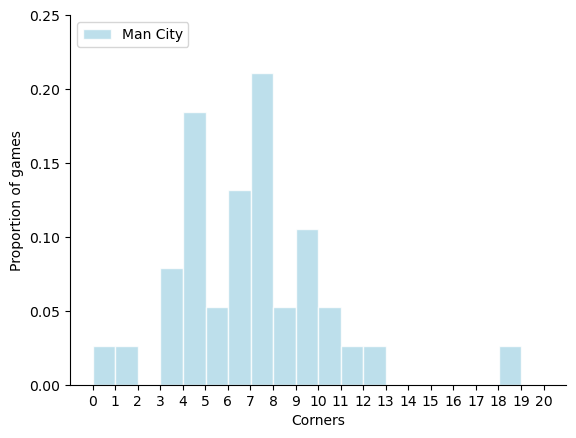

In [45]:
# get city's matches
city_corners = summary2[summary2['name']=='Manchester City']['corners']

fig,ax1 = plt.subplots(1,1)
ax1.hist(city_corners,np.arange(0.01,20.05,1), color='lightblue', edgecolor = 'white',alpha=0.8,label = 'Man City', density=True)

FormatFigure(ax1)

## use a one-sided t-test
to check if Man city took more corners than the PL's average

In [46]:
from scipy.stats import ttest_1samp
t, pvalue = ttest_1samp(city_corners,popmean=avg_corners)

In [48]:
print("The t-staistic is %.2f and the P-value is %.2f."%(t,pvalue))
if pvalue < 0.05:
    print("We reject null hypothesis - " + 'Man City' + " typically take more than 6 corners per match.")
else:
    print("We cannot reject null hypothesis - " + 'Man City' + " do not typically take more than 6 corners per match.")

The t-staistic is 4.14 and the P-value is 0.00.
We reject null hypothesis - Man City typically take more than 6 corners per match.


# Two-sample two-sided t-test

Compare Man United and Man City in terms of corners per match


In [50]:
united_corners = summary2[summary2['name']=='Manchester United']['corners']
mean = united_corners.mean()
std = united_corners.std()
print('Man Utd typically had %.2f plus/minus %.2f corners per match in the 2017/18 season.'%(mean,std))
std_error=std/np.sqrt(len(united_corners))
print('The standard error in the number of corners per match is %.4f'%std_error)

Man Utd typically had 5.71 plus/minus 2.84 corners per match in the 2017/18 season.
The standard error in the number of corners per match is 0.4602


In [51]:
mean = city_corners.mean()
std = city_corners.std()
print('Man City typically had %.2f plus/minus %.2f corners per match in the 2017/18 season.'%(mean,std))
std_error=std/np.sqrt(len(united_corners))
print('The standard error in the number of corners per match is %.4f'%std_error)

Man City typically had 7.50 plus/minus 3.28 corners per match in the 2017/18 season.
The standard error in the number of corners per match is 0.5317


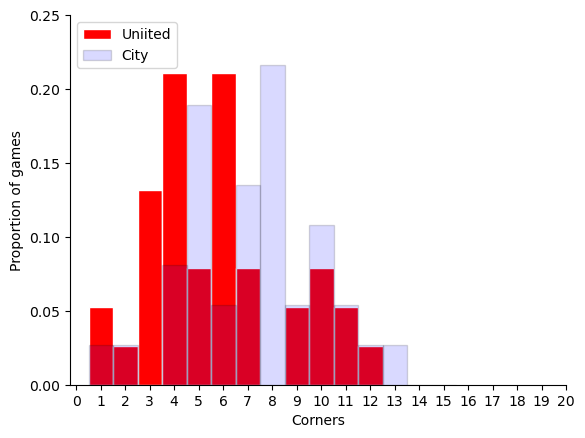

In [56]:
fig,ax=plt.subplots(1,1)
ax.hist(united_corners, np.arange(0.01,15.5,1), color='red', edgecolor = 'white',linestyle='-',alpha=1, label="Uniited", density=True,align='right')
ax.hist(city_corners, np.arange(0.01,15.5,1), alpha=0.15, color='blue', edgecolor = 'black', label='City',  density=True,align='right')
FormatFigure(ax)

Test if City and United had a different avg corners per game


In [57]:
from scipy.stats import ttest_ind
t, pvalue  = ttest_ind(a=city_corners, b=united_corners, equal_var=True)

In [58]:
print("The t-staistic is %.2f and the P-value is %.2f."%(t,pvalue))
if pvalue < 0.05:
    print("We reject null hypothesis - City took different number of corners per game than United")
else:
    print("We cannot reject the null hypothesis that City took the same number of corners per game as United")

The t-staistic is 2.54 and the P-value is 0.01.
We reject null hypothesis - City took different number of corners per game than United
